In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[1234].shape

(28, 28)

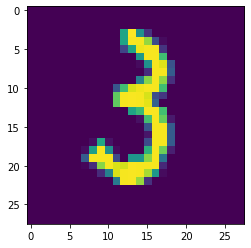

In [5]:
x_train[1234]
plt.imshow(x_train[1234], )

In [6]:
y_train[1234]

3

In [7]:
# CNN 本身 Input 是矩陣
# CNN 要的格式 28*28 的一張 (28, 28, 1)
# 按照三張分色 或四張分色 就要有三張或四張()因為我們現在是灰階所以只要一張

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [9]:
# 因為希望數字不要是 3.7 8.2 因為結果間沒有連續關係
# one hot encoding


from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_train[1234]
# 就會在第四個值是 1 其他都是 0

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
# 壓縮 0-1 (原是 0-255)
# 數值大的容易成為關鍵
# 不是 0-1 不能用統計的理論

x_train = x_train/255
x_test = x_test/255

In [13]:
# 3 次 convolution 3 次 max-pooling
# 2 層 dense

# 

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD







In [38]:
model = Sequential()

In [39]:
# 4 個 filter 3*3的大小
# 加邊緣記分板同樣大小
# 第一層

model.add(Conv2D(4, (3, 3), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [40]:
model.add(MaxPool2D(pool_size=(2,2)))

In [41]:
# 第二層
model.add(Conv2D(8, (3, 3), padding='same',
                activation='relu'))

In [42]:
# 不一定每次都要 maxpooling
model.add(MaxPool2D(pool_size=(2,2)))

In [43]:
# 第三層
model.add(Conv2D(16, (3, 3), padding='same',
                activation='relu'))

In [44]:
model.add(MaxPool2D(pool_size=(2,2)))

In [45]:
# fully connected

model.add(Flatten())
model.add(Dense(8, activation='relu'))

In [46]:
model.add(Dense(20, activation='relu'))

In [47]:
# 結果輸出
model.add(Dense(10, activation='softmax'))

In [48]:
model.compile(loss='mse', optimizer=SGD(lr=0.3), metrics=['accuracy'])

In [49]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 144)               0         
__________

In [50]:
model.fit(x_train, y_train, batch_size=70, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 25s 413us/step - loss: 0.0856 - acc: 0.3009
Epoch 2/15
60000/60000 [==============================] - 24s 405us/step - loss: 0.0326 - acc: 0.7641
Epoch 3/15
60000/60000 [==============================] - 24s 408us/step - loss: 0.0127 - acc: 0.9167
Epoch 4/15
60000/60000 [==============================] - 25s 410us/step - loss: 0.0090 - acc: 0.9413
Epoch 5/15
60000/60000 [==============================] - 22s 375us/step - loss: 0.0076 - acc: 0.9499
Epoch 6/15
60000/60000 [==============================] - 22s 374us/step - loss: 0.0068 - acc: 0.9555
Epoch 7/15
60000/60000 [==============================] - 23s 389us/step - loss: 0.0062 - acc: 0.95921s - loss: 0.006
Epoch 8/15
60000/60000 [==============================] - 22s 374us/step - loss: 0.0057 - acc: 0.9632
Epoch 9/15
60000/60000 [==============================] - 22s 364us/step - loss: 0.0054 - acc: 0.9654
Epoch 10/15
60000/60000 [==============================] - 22s 372

In [51]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 81us/step


In [53]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.00464
測試資料的正確率: 0.971


In [54]:
model.save('myCNNModel.h5')

In [55]:
del model

In [56]:
from keras.models import load_model

In [57]:
model = load_model('myCNNmodel.h5')

In [58]:
predict = model.predict_classes(x_test)

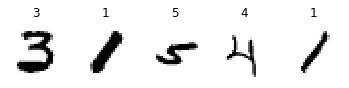

In [59]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")